In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Load the pre-split data
train_df = pd.read_csv('csv/pokemon_train.csv')
test_df = pd.read_csv('csv/pokemon_test.csv')

# Prepare features and targets
features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Height(m)', 'Weight(kg)']
X_train = train_df[features]
y_train_type = train_df['Primary_Type']
y_train_gen = train_df['Generation']

X_test = test_df[features]
y_test_type = test_df['Primary_Type']
y_test_gen = test_df['Generation']

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression for Generation prediction
lr_model = LogisticRegression(multi_class='ovr', max_iter=1000)
lr_model.fit(X_train_scaled, y_train_gen)
lr_predictions = lr_model.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test_gen, lr_predictions)
print(f"Logistic Regression Accuracy for Generation prediction: {lr_accuracy}")
print("\nClassification Report for Generation prediction:")
print(classification_report(y_test_gen, lr_predictions))

# K-NN for Type prediction
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train_type)
knn_predictions = knn_model.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test_type, knn_predictions)
print(f"\nK-NN Accuracy for Type prediction: {knn_accuracy}")
print("\nClassification Report for Type prediction:")
print(classification_report(y_test_type, knn_predictions))

Logistic Regression Accuracy for Generation prediction: 0.2

Classification Report for Generation prediction:
              precision    recall  f1-score   support

         1.0       0.24      0.39      0.30        33
         2.0       0.12      0.06      0.08        18
         3.0       0.15      0.19      0.17        26
         4.0       0.05      0.06      0.06        16
         5.0       0.28      0.46      0.34        35
         6.0       0.00      0.00      0.00        12
         7.0       0.25      0.05      0.08        20
         8.0       0.00      0.00      0.00        17
         9.0       0.17      0.14      0.15        28

    accuracy                           0.20       205
   macro avg       0.14      0.15      0.13       205
weighted avg       0.17      0.20      0.17       205


K-NN Accuracy for Type prediction: 0.18048780487804877

Classification Report for Type prediction:
              precision    recall  f1-score   support

         Bug       0.19      0

/Users/marvinchen/Desktop/IW/cos-independent-work/cos397/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/marvinchen/Desktop/IW/cos-independent-work/cos397/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/marvinchen/Desktop/IW/cos-independent-work/cos397/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn

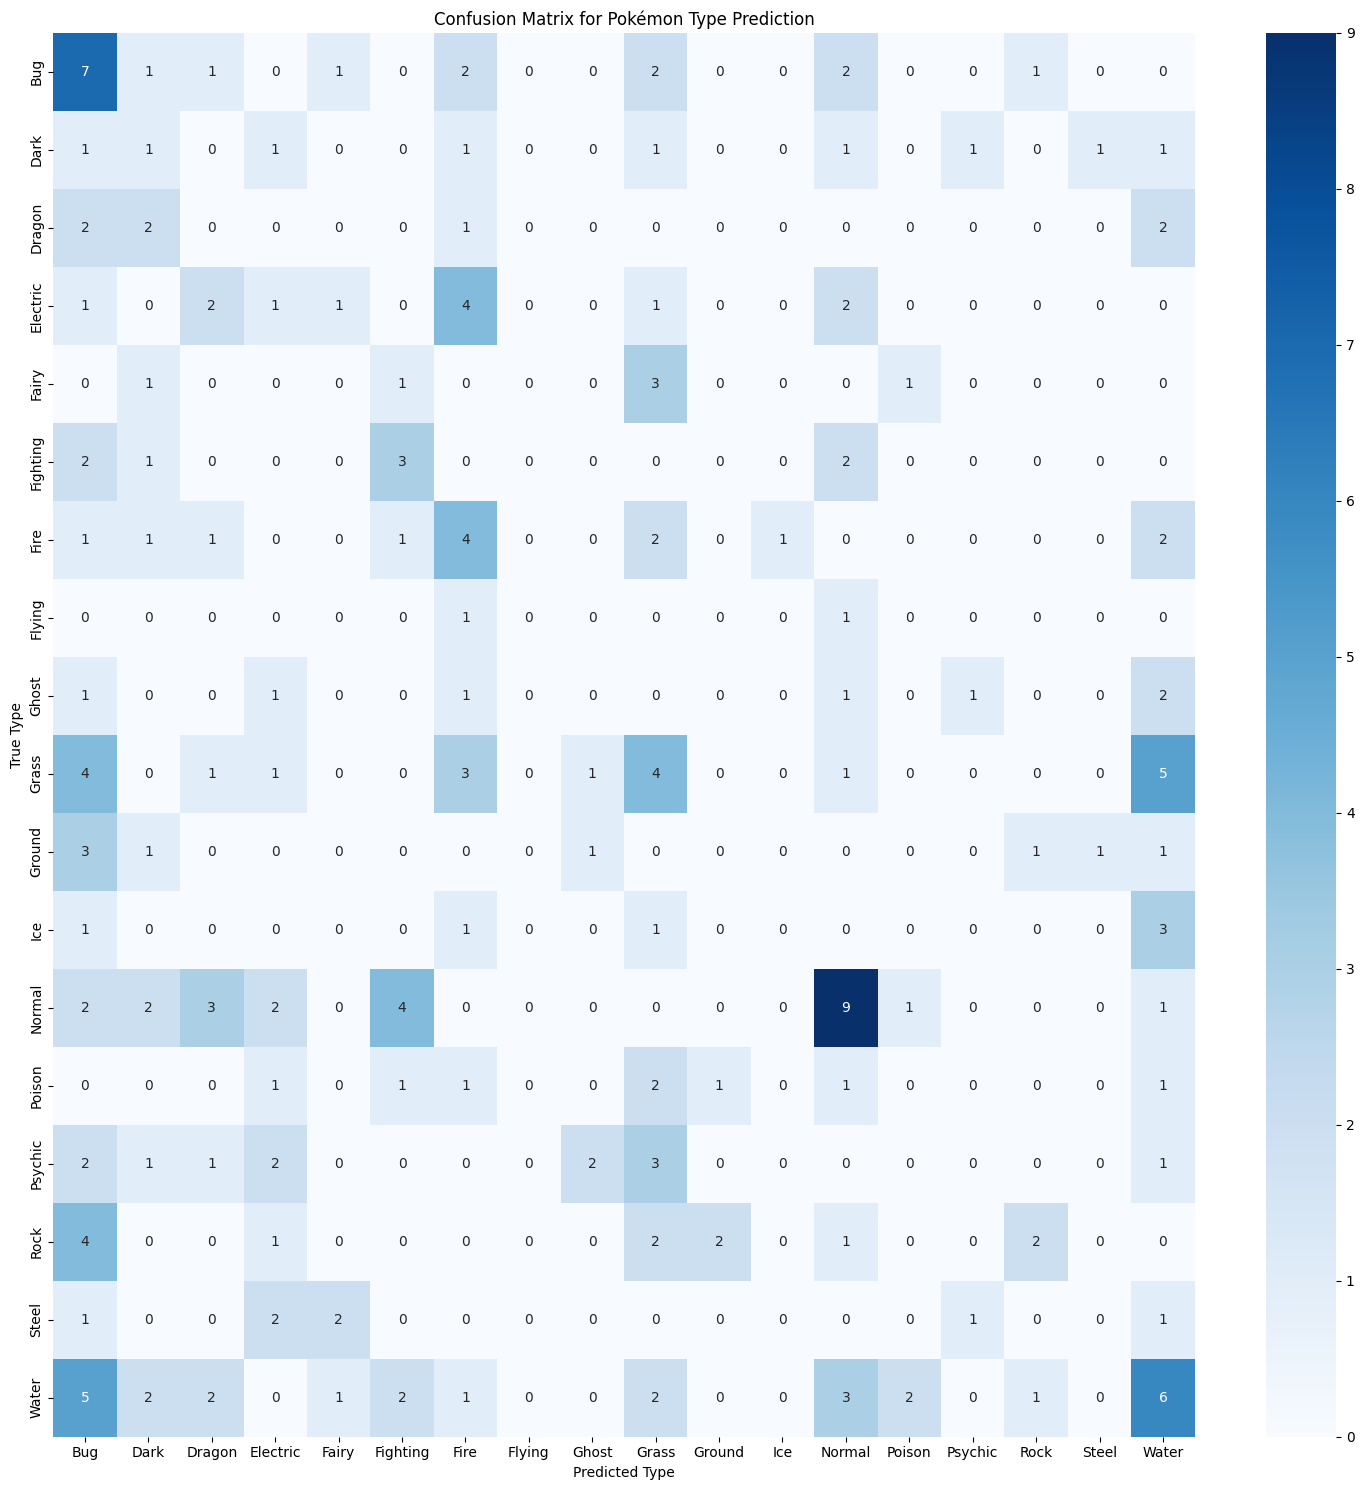

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(15, 15))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix for Pokémon Type Prediction')
    plt.ylabel('True Type')
    plt.xlabel('Predicted Type')
    plt.tight_layout()
    plt.show()

# Get predictions on the test set
y_true = y_test_type  # True labels from your test set
y_pred = knn_model.predict(X_test_scaled)  # Predictions on the test set

# Get unique classes (Pokémon types)
classes = np.unique(y_true)

# Plot the confusion matrix
plot_confusion_matrix(y_true, y_pred, classes)

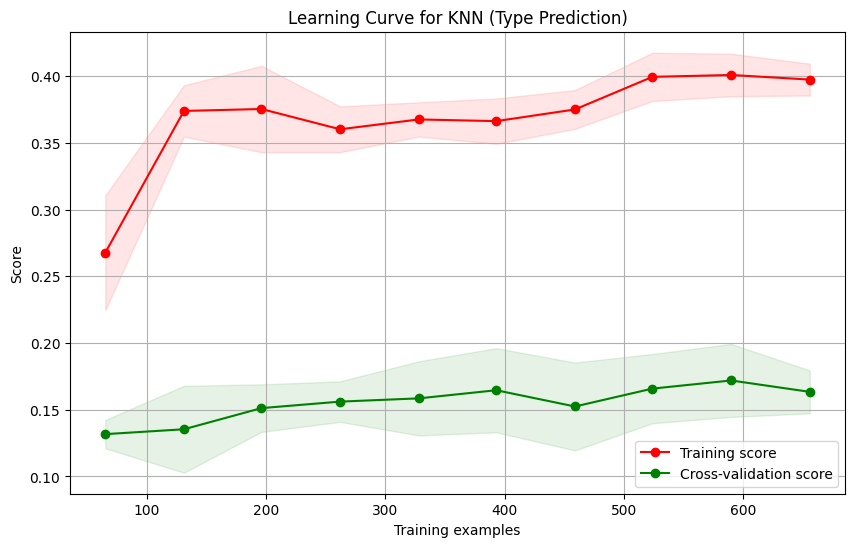

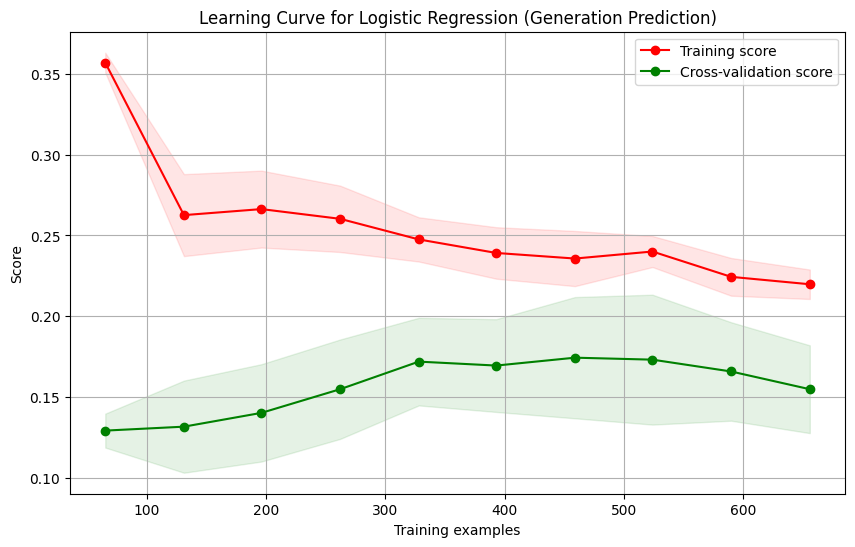

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier # suppress deprecation warning
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score, mean_squared_error

def plot_learning_curve(estimator, X, y, title, scoring):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=-1, 
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring=scoring)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                     val_scores_mean + val_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

# For KNN model (Type Prediction)
knn = KNeighborsClassifier(n_neighbors=5)
plot_learning_curve(knn, X_train_scaled, y_train_type, "Learning Curve for KNN (Type Prediction)", 'accuracy')

# For Logistic Regression model (Generation Prediction)
# lr = LogisticRegression(multi_class='ovr', max_iter=1000)
lr_model = OneVsRestClassifier(LogisticRegression(max_iter=1000))
plot_learning_curve(lr_model, X_train_scaled, y_train_gen, "Learning Curve for Logistic Regression (Generation Prediction)", 'accuracy')

In [9]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
import numpy as np

# For Logistic Regression (Generation prediction)
lr_params = {'estimator__C': [0.1, 1, 10], 'estimator__solver': ['lbfgs', 'liblinear']}
lr_grid = GridSearchCV(OneVsRestClassifier(LogisticRegression(max_iter=1000)), lr_params, cv=5, scoring='accuracy')
lr_grid.fit(X_train_scaled, y_train_gen)

best_lr = lr_grid.best_estimator_
lr_cv_scores = cross_val_score(best_lr, X_train_scaled, y_train_gen, cv=5, scoring='accuracy')

# For K-NN (Type prediction)
knn_params = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance']}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='accuracy')
knn_grid.fit(X_train_scaled, y_train_type)

best_knn = knn_grid.best_estimator_
knn_cv_scores = cross_val_score(best_knn, X_train_scaled, y_train_type, cv=5, scoring='accuracy')

# Print results
print("Logistic Regression Results (Generation prediction):")
print(f"Best parameters: {lr_grid.best_params_}")
print(f"Cross-validation Accuracy: {lr_cv_scores.mean():.4f} (+/- {lr_cv_scores.std() * 2:.4f})")
print(f"Test Accuracy: {lr_grid.score(X_test_scaled, y_test_gen):.4f}")

print("\nK-NN Results (Type prediction):")
print(f"Best parameters: {knn_grid.best_params_}")
print(f"Cross-validation Accuracy: {knn_cv_scores.mean():.4f} (+/- {knn_cv_scores.std() * 2:.4f})")
print(f"Test Accuracy: {knn_grid.score(X_test_scaled, y_test_type):.4f}")

# Compare with initial models
initial_lr_accuracy = lr_model.score(X_test_scaled, y_test_gen)
initial_knn_accuracy = knn_model.score(X_test_scaled, y_test_type)

print("\nImprovement:")
print(f"Logistic Regression Accuracy improvement: {lr_grid.score(X_test_scaled, y_test_gen) - initial_lr_accuracy:.4f}")
print(f"K-NN Accuracy improvement: {knn_grid.score(X_test_scaled, y_test_type) - initial_knn_accuracy:.4f}")

Logistic Regression Results (Generation prediction):
Best parameters: {'estimator__C': 1, 'estimator__solver': 'lbfgs'}
Cross-validation Accuracy: 0.1549 (+/- 0.0543)
Test Accuracy: 0.2000

K-NN Results (Type prediction):
Best parameters: {'n_neighbors': 11, 'weights': 'distance'}
Cross-validation Accuracy: 0.2024 (+/- 0.0569)
Test Accuracy: 0.1854


NotFittedError: This OneVsRestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

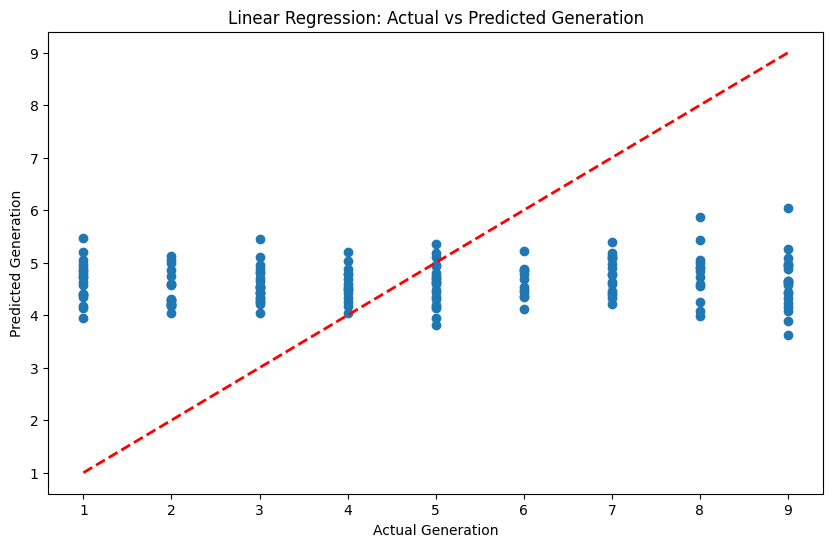

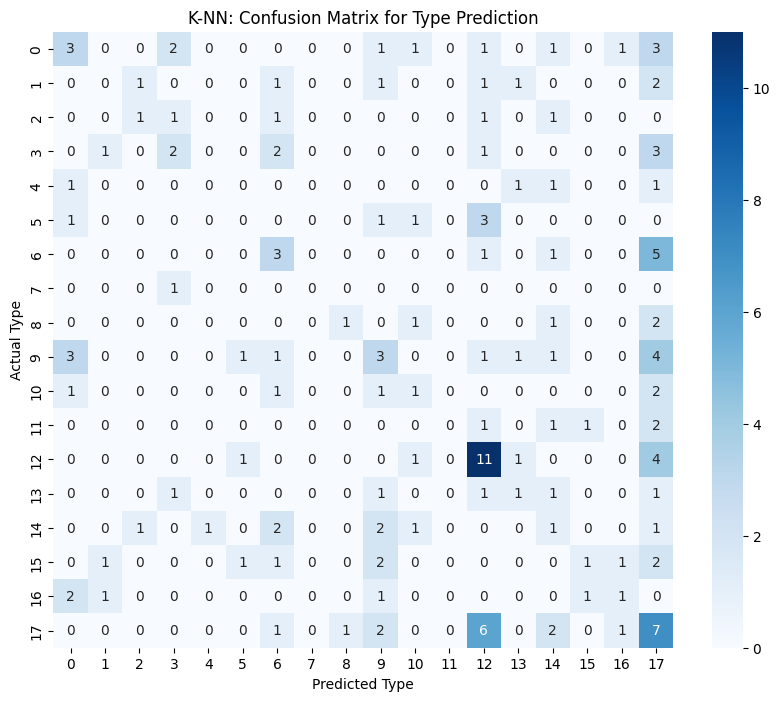

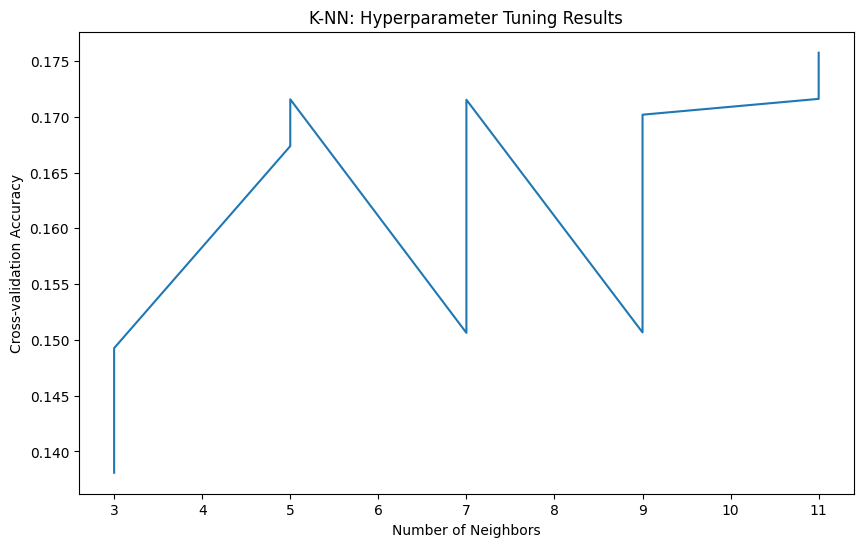

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Visualize Linear Regression results
plt.figure(figsize=(10, 6))
plt.scatter(y_val_gen, lr_grid.predict(X_val_scaled))
plt.plot([y_val_gen.min(), y_val_gen.max()], [y_val_gen.min(), y_val_gen.max()], 'r--', lw=2)
plt.xlabel('Actual Generation')
plt.ylabel('Predicted Generation')
plt.title('Linear Regression: Actual vs Predicted Generation')
plt.show()

# Visualize K-NN results
cm = confusion_matrix(y_val_type, knn_grid.predict(X_val_scaled))
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Type')
plt.ylabel('Actual Type')
plt.title('K-NN: Confusion Matrix for Type Prediction')
plt.show()

# Visualize K-NN hyperparameter tuning results
results = knn_grid.cv_results_
plt.figure(figsize=(10, 6))
plt.plot(results['param_n_neighbors'], results['mean_test_score'])
plt.xlabel('Number of Neighbors')
plt.ylabel('Cross-validation Accuracy')
plt.title('K-NN: Hyperparameter Tuning Results')
plt.show()